# Computer vision and Deep Learning efficient experiment and development code

In [1]:
import tensorflow as tf
slim = tf.contrib.slim
from matplotlib import pyplot as plt
import os
import cv2

## 1. Dataset handling

### 1-1 Download and make tfrecords of famous image dataset

In [2]:
from datasets.data_downloader import mnist, flowers, cifar10

In [3]:
dataset_root = '/home/dan/prj/datasets'

In [4]:
mnist.run(os.path.join(dataset_root, 'mnist'))

>> Downloading 100.1%
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
>> Downloading 113.5%
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
>> Downloading 100.4%
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
>> Downloading 180.4%
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting images from:  /home/dan/prj/datasets/mnist/train-images-idx3-ubyte.gz
Extracting labels from:  /home/dan/prj/datasets/mnist/train-labels-idx1-ubyte.gz
>> Converting image 2999/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 7172/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 11242/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 15155/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 19218/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 23316/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 27453/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 31561/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 35705/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 39897/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 44067/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 48213/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 52398/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 56630/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 60000/60000Extracting images from:  /home/dan/prj/datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting labels from:  /home/dan/prj/datasets/mnist/t10k-labels-idx1-ubyte.gz
>> Converting image 757/10000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 5170/10000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 9698/10000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
flowers.run(os.path.join(dataset_root, 'flowers'))

In [ ]:
cifar10.run(os.path.join(dataset_root, 'cifar10'))

### 1-2. create tfrecord from directorized images with classes.

In [2]:
from datasets.tfrecord_creator import converter
datasetname = 'figures'
dataset_dir = '/home/hukim/prj/datasets/figures/photos'
_NUM_VALIDATION = 3000
_NUM_SHARD = 5

tfrecord = converter.tf_converter(datasetname, dataset_dir, _NUM_VALIDATION, _NUM_SHARD)
tfrecord.run()

>> Converting image 27000/27000 shard 4
>> Converting image 3000/3000 shard 4

Finished converting the dataset!


### 1-3. Get dataset using data_provider

In [5]:
from datasets.tfrecord_reader import tfrecord_reader

In [6]:
dataset_dir = '/home/dan/prj/datasets/mnist/'
dataset = tfrecord_reader.get_split('mnist', 'train', dataset_dir)

In [97]:
with tf.Graph().as_default(): 
    dataset_dir = '/home/dan/prj/datasets/mnist'
    dataset = tfrecord_reader.get_split('mnist', 'train', dataset_dir)
    
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(300):
                np_image, np_label = sess.run([image, label])
                height, width, _ = np_image.shape
                name = dataset.labels_to_names[np_label]
                
                plt.figure()
                plt.imshow(np_image[:,:,0], cmap='gray')
                cv2.imwrite('/home/dan/mnist/'+class_name+str(i)+'.png',np_image[:,:,0])
                #print(np_image[:,:,0])
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()

In [87]:
img = cv2.imread('/home/dan/mnist/0'+'.png')

In [88]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [89]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 222, 225,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 147, 234, 252, 176,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         23, 197, 253, 252, 208,  19,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        178, 252, 253, 117,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

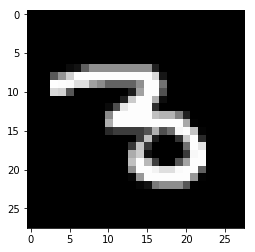

In [73]:
plt.imshow(img, cmap='gray')